# Plots for HLS4ML jet tagging paper

1. Accuracy versus Bitwidth ( including no quantisation )
2. FPR@xTPR versus Bitwidth ( x=0.3, 0.5, 0.8 )

TODO: (How to do the accuracy?)
TODO: No quantisation?

Files in .csv-format in ./data/

The following architectures are considered:
1. QGraphConv
2. QInteractionNetwork
3. QMLP
3. QGarNet

The files contain the ROCAUC for each class label and the fpr @ (0.3, 0.5, 0.8) TPR
The quantisation is in the range from 2 to 16.

The file naming pattern is \<METRIC\>\_\<Architecture\>\_nconst\_8\_nbits\_\<nbits\>.csv
Some files had to be renamed to match the pattern with some small script.

**Some variables are overridden during the code execution, so whole blocks should be rerun before some changes in the upper blocks can take effect**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

import itertools
import os

%matplotlib inline

from matplotlib.ticker import MultipleLocator, AutoMinorLocator

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
plt.style.use(hep.style.CMS)
plt.style.use('./rcParams.mplstyle')
plt.style.use('tableau-colorblind10')

In [4]:
DATADIR = "data_errorbands"
RESULTDIR = "results"

metrics = (
    r"FPR@TPR",
    "ROCAUC",
)

tprs = (0.3, 0.5, 0.8)

architectures = (
    "QGraphConv",
    "QInteractionNetwork",
    "QMLP",
    "QGarnet",  
)

model_labels = (
    "GCN",
    "IN",
    "MLP",
    "GarNet",  
)

nbits = tuple([int(x) for x in list(range(2, 17))])

In [5]:
os.mkdir(RESULTDIR)

In [6]:
print(nbits)

(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)


In [7]:
df = pd.read_csv(f"{DATADIR}/{metrics[0]}_{architectures[-1]}_nconst_8_nbits_{nbits[0]}_KFold_10.csv", sep=r'\s*,\s*', engine='python',)
df

model  label  tpr  fpr_mean   fpr_std
0   QGarnet  gluon  0.3  0.056185  0.002808
1   QGarnet  gluon  0.5  0.128778  0.007746
2   QGarnet  gluon  0.8  0.377402  0.012922
3   QGarnet  quark  0.3  0.028777  0.002210
4   QGarnet  quark  0.5  0.069350  0.003314
5   QGarnet  quark  0.8  0.243201  0.003634
6   QGarnet      W  0.3  0.035953  0.003675
7   QGarnet      W  0.5  0.082251  0.005671
8   QGarnet      W  0.8  0.237765  0.014732
9   QGarnet      Z  0.3  0.028180  0.004866
10  QGarnet      Z  0.5  0.081556  0.009840
11  QGarnet      Z  0.8  0.289843  0.012007
12  QGarnet    top  0.3  0.013071  0.000653
13  QGarnet    top  0.5  0.025763  0.001266
14  QGarnet    top  0.8  0.123571  0.008898

In [8]:
df.keys()

Index(['model', 'label', 'tpr', 'fpr_mean', 'fpr_std'], dtype='object')

In [9]:
list(df['label'].unique())

['gluon', 'quark', 'W', 'Z', 'top']

In [10]:
labels = list(df['label'].unique())
labels = tuple([labels[1], labels[0], *labels[2:]]) #sort for paper order

labels_paper_style = tuple((l[0] for l in labels)) # match 

In [11]:
labels_paper_style

('q', 'g', 'W', 'Z', 't')

## FPR @ TPR
### Data prep

In [12]:
metric = metrics[0]
frames = []
for model in architectures:
    model_data = f"{DATADIR}/{metric}_{model}_nconst_8_nbits"
    for n in nbits:
        df_i = pd.read_csv(f"{model_data}_{n}_KFold_10.csv",
                           index_col=[0, 2, 1],
                           sep=r'\s*,\s*', engine='python',
                          
                          )
        df_i['nbits'] = n
        #print(df_i)
        frames.append(df_i)
#frames = list(itertools.chain(*frames))
df_models_fpr = pd.concat(frames)
df_models_fpr

fpr_mean   fpr_std  nbits
model      tpr label                           
QGraphConv 0.3 gluon  0.089274  0.023696      2
           0.5 gluon  0.200606  0.031154      2
           0.8 gluon  0.568404  0.053869      2
           0.3 quark  0.058497  0.019303      2
           0.5 quark  0.106746  0.025190      2
...                        ...       ...    ...
QGarnet    0.5 Z      0.031924  0.001234     16
           0.8 Z      0.205443  0.004951     16
           0.3 top    0.008714  0.000360     16
           0.5 top    0.020550  0.000690     16
           0.8 top    0.102237  0.002399     16

[900 rows x 3 columns]

In [13]:
#dir(df_models_fpr)

In [14]:
df_models_fpr

fpr_mean   fpr_std  nbits
model      tpr label                           
QGraphConv 0.3 gluon  0.089274  0.023696      2
           0.5 gluon  0.200606  0.031154      2
           0.8 gluon  0.568404  0.053869      2
           0.3 quark  0.058497  0.019303      2
           0.5 quark  0.106746  0.025190      2
...                        ...       ...    ...
QGarnet    0.5 Z      0.031924  0.001234     16
           0.8 Z      0.205443  0.004951     16
           0.3 top    0.008714  0.000360     16
           0.5 top    0.020550  0.000690     16
           0.8 top    0.102237  0.002399     16

[900 rows x 3 columns]

In [15]:
df_models_fpr.loc[pd.IndexSlice[('QGraphConv', 0.3, 'gluon')]]

fpr_mean   fpr_std  nbits
model      tpr label                           
QGraphConv 0.3 gluon  0.089274  0.023696      2
               gluon  0.052543  0.001693      3
               gluon  0.047760  0.002494      4
               gluon  0.044615  0.001569      5
               gluon  0.042783  0.000946      6
               gluon  0.041797  0.001103      7
               gluon  0.041832  0.001635      8
               gluon  0.041734  0.001614      9
               gluon  0.041139  0.001603     10
               gluon  0.041088  0.000817     11
               gluon  0.041106  0.000947     12
               gluon  0.041050  0.000989     13
               gluon  0.041326  0.001740     14
               gluon  0.041371  0.001431     15
               gluon  0.040902  0.001592     16

In [16]:
df_models_fpr.loc[pd.IndexSlice[('QInteractionNetwork', 0.3, 'quark')]]

fpr_mean   fpr_std  nbits
model               tpr label                           
QInteractionNetwork 0.3 quark  0.037046  0.003625      2
                        quark  0.027469  0.003592      3
                        quark  0.022905  0.000982      4
                        quark  0.021412  0.001109      5
                        quark  0.021191  0.000515      6
                        quark  0.020348  0.000731      7
                        quark  0.019901  0.000584      8
                        quark  0.019689  0.000550      9
                        quark  0.019858  0.000520     10
                        quark  0.019860  0.000488     11
                        quark  0.019311  0.000399     12
                        quark  0.019609  0.000612     13
                        quark  0.020104  0.000408     14
                        quark  0.019857  0.000554     15
                        quark  0.019494  0.000452     16

### Plots

<ipython-input-17-8c985ccc63eb>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-8c985ccc63eb>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-8c985ccc63eb>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-8c985ccc63eb>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-8c985ccc63eb>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-8c985ccc63eb>:37: UserWarning: Matplotlib 

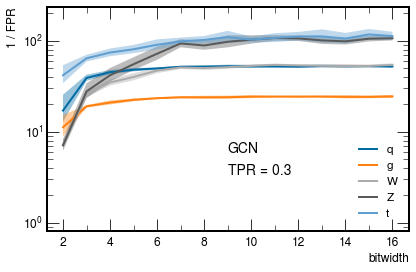

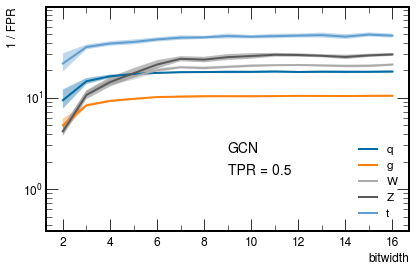

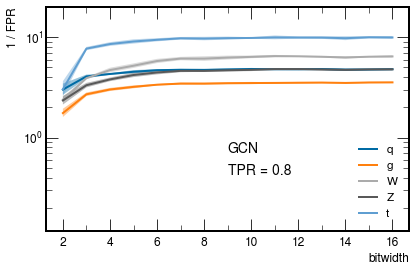

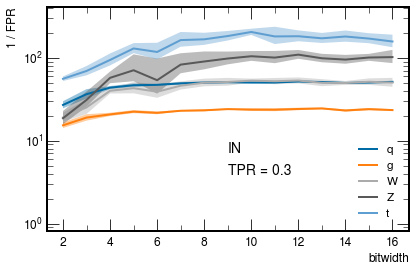

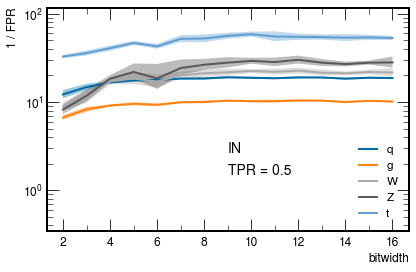

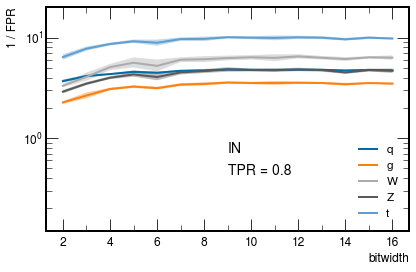

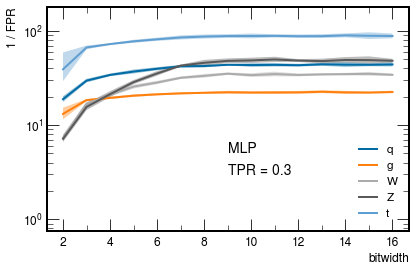

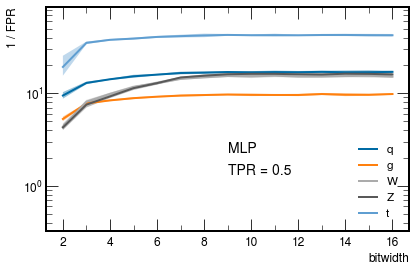

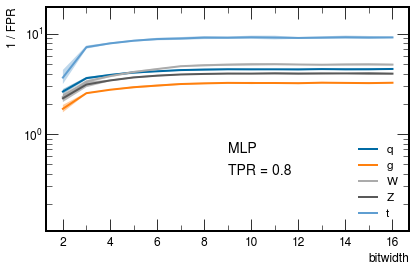

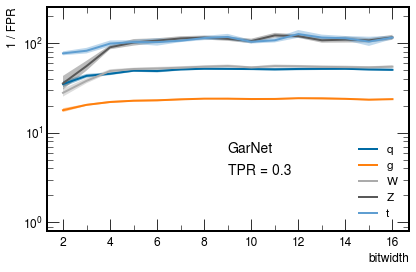

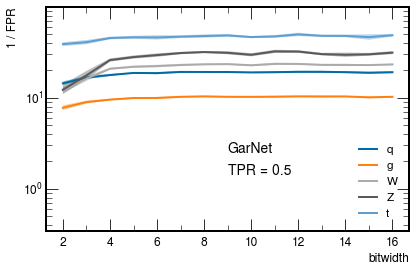

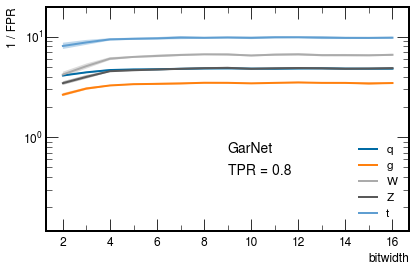

In [17]:
# error propagation!
# y = 1/x -> std_y = 1/x**2 * std_x
std_fpr = 0.05
for j, model in enumerate(architectures):
    for i, tpr in enumerate(tprs):
        fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)
        #axs.set_title(f"{tpr:.1f} TPR")
        for n, label in enumerate(labels):
            bitwidth = df_models_fpr.loc[(model, tpr, label), 'nbits'];
            fpr_mean = df_models_fpr.loc[(model, tpr, label), 'fpr_mean'];
            fpr_std = df_models_fpr['fpr_std'][model, tpr, label];
            axs.plot(bitwidth, 1/fpr_mean, label=labels_paper_style[n])
            axs.fill_between(bitwidth, 1/(fpr_mean+fpr_std), 1/(fpr_mean-fpr_std), alpha=0.4)
            if label == 'top':
                max_1_over_fpr_top = max(1/fpr_mean)
            if label == 'gluon':
                max_1_over_fpr_gluon = max(1/fpr_mean)
        axs.set_xlabel("bitwidth")
        axs.set_ylabel("1 / FPR")
        axs.legend(#title=f"{model_labels[j]}\nTPR = {tpr:.1f}", 
                   loc="lower right")
        axs.set_yscale('log')
        axs.set_ylim(1/30 * max_1_over_fpr_gluon, 2 * max_1_over_fpr_top)
        axs.text(0.5, 0.35, model_labels[j], transform=axs.transAxes)
        axs.text(0.5, 0.25, f"TPR = {tpr:.1f}", transform=axs.transAxes)
        axs.xaxis.set_major_locator(MultipleLocator(2))
        axs.xaxis.set_major_formatter('{x:.0f}')
    
        # For the minor ticks, use no labels; default NullFormatter.
        axs.xaxis.set_minor_locator(MultipleLocator(1))

        #print(dir(axs[0]))
        #handles, labels = axs[0].get_legend_handles_labels()
        #fig.legend(handles, labels)
        fig.savefig(f"./{RESULTDIR}/{model_labels[j]}_log_1_over_fpr_at_{str(tpr).replace('.', 'p')}tpr.pdf")
        fig.savefig(f"./{RESULTDIR}/{model_labels[j]}_log_1_over_fpr_at_{str(tpr).replace('.', 'p')}tpr.png", dpi=300)
        fig.show()

### Comparison Plots

<ipython-input-18-8dda21b7c7e3>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-18-8dda21b7c7e3>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


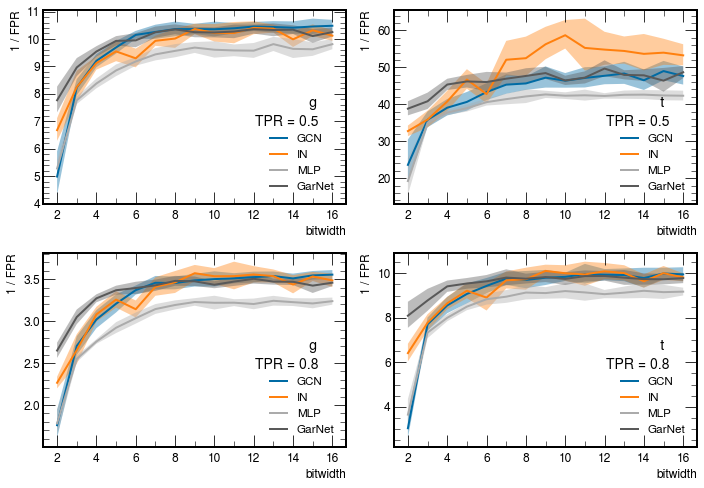

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7), tight_layout=True, sharey=False)
for i, tpr in enumerate(tprs[1:]):
    for j, l in enumerate([1, 4]):
        for k, model in enumerate(architectures):
            bitwidth = df_models_fpr['nbits'][model, tpr, labels[l]];
            fpr_mean = df_models_fpr['fpr_mean'][model, tpr, labels[l]];
            fpr_std = df_models_fpr['fpr_std'][model, tpr, labels[l]];
            axs[i, j].plot(bitwidth, 1/fpr_mean, label=model_labels[k])
            axs[i, j].fill_between(bitwidth, 1/(fpr_mean+fpr_std), 1/(fpr_mean-fpr_std), alpha=0.4)
        axs[i, j].set_xlabel("bitwidth")
        axs[i, j].set_ylabel("1 / FPR")
        axs[i, j].legend(loc="lower right")
        #axs[i, j].set_yscale('log')
        axs[i, j].xaxis.set_ticks(range(2, 17, 2))
        axs[i, j].text(0.7, 0.5, labels_paper_style[l].rjust(15), transform=axs[i, j].transAxes)
        axs[i, j].text(0.7, 0.4, f"TPR = {tpr:.1f}", transform=axs[i, j].transAxes)
        axs[i, j].xaxis.set_major_locator(MultipleLocator(2))
        axs[i, j].xaxis.set_major_formatter('{x:.0f}')
    
        # For the minor ticks, use no labels; default NullFormatter.
        axs[i, j].xaxis.set_minor_locator(MultipleLocator(1))
        #axs[i, j].set_ylim(10e-2, 1e3)
    #print(dir(axs[0]))
    #handles, labels = axs[0].get_legend_handles_labels()
    #fig.legend(handles, labels)
    fig.savefig(f"./{RESULTDIR}/1_over_fpr_at_xtpr_model_comp.pdf")
    fig.savefig(f"./{RESULTDIR}/1_over_fpr_at_xtpr_model_comp.png", dpi=300)
    fig.show()

<ipython-input-19-92811dfc4e06>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


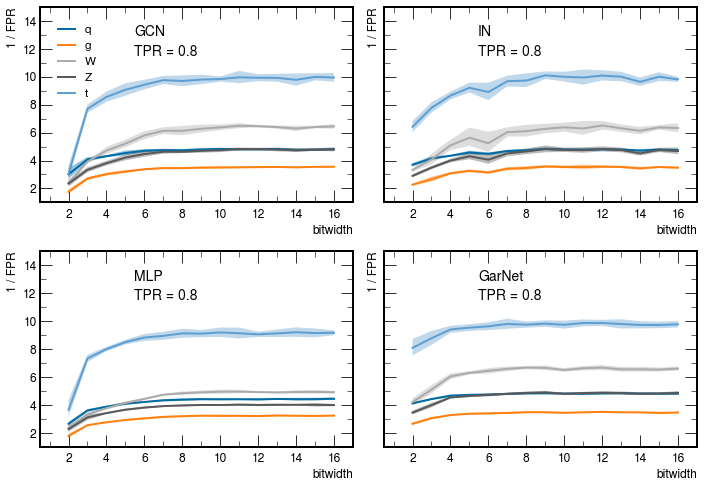

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7), tight_layout=True,
                        sharey=True,
                       )
axs = axs.flatten()
tpr = 0.8
for j, model in enumerate(architectures):
    for k, label in enumerate(labels):
        bitwidth = df_models_fpr['nbits'][model, tpr, label];
        fpr_mean = df_models_fpr['fpr_mean'][model, tpr, label];
        fpr_std = df_models_fpr['fpr_std'][model, tpr, label];
        axs[j].plot(bitwidth, 1/fpr_mean, label=labels_paper_style[k])
        axs[j].fill_between(bitwidth, 1/(fpr_mean+fpr_std), 1/(fpr_mean-fpr_std), alpha=0.4)
    axs[j].set_xlabel("bitwidth")
    axs[j].set_ylabel("1 / FPR")
    
    
    axs[j].xaxis.set_ticks(range(2, 17, 2))
    axs[j].text(0.3, 0.85, model_labels[j], transform=axs[j].transAxes)
    axs[j].text(0.3, 0.75, f"TPR = {tpr:.1f}", transform=axs[j].transAxes)
    axs[j].xaxis.set_major_locator(MultipleLocator(2))
    axs[j].xaxis.set_major_formatter('{x:.0f}')

    # For the minor ticks, use no labels; default NullFormatter.
    axs[j].xaxis.set_minor_locator(MultipleLocator(1))
    axs[j].yaxis.set_minor_locator(MultipleLocator(1))
    axs[j].set_ylim(1, 15)
    axs[j].set_xlim(0.5, 17)
    #axs[j].set_xscale("log")
    #print(dir(axs[0]))
axs[0].legend(
         borderaxespad=1,
    #    loc="lower right",
    )
fig.savefig(f"./{RESULTDIR}/1_over_fpr_at_0p8tpr_model_comp.pdf")
fig.savefig(f"./{RESULTDIR}/1_over_fpr_at_0p8tpr_model_comp.png", dpi=300)
fig.show()

<ipython-input-20-59a4b2a3358b>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-20-59a4b2a3358b>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-20-59a4b2a3358b>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-20-59a4b2a3358b>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


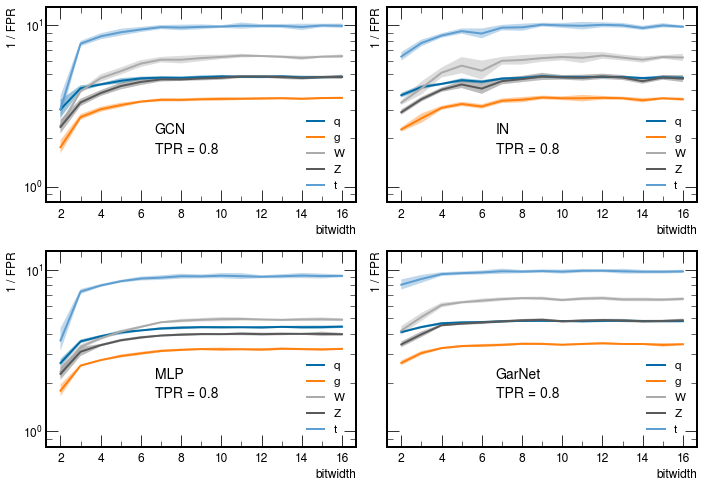

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7), tight_layout=True, sharey=True)
axs = axs.flatten()
tpr = 0.8
for j, model in enumerate(architectures):
    for k, label in enumerate(labels):
        bitwidth = df_models_fpr['nbits'][model, tpr, label];
        fpr_mean = df_models_fpr['fpr_mean'][model, tpr, label];
        fpr_std = df_models_fpr['fpr_std'][model, tpr, label];
        axs[j].plot(bitwidth, 1/fpr_mean, label=labels_paper_style[k])
        axs[j].fill_between(bitwidth, 1/(fpr_mean+fpr_std), 1/(fpr_mean-fpr_std), alpha=0.4)
    axs[j].set_xlabel("bitwidth")
    axs[j].set_ylabel("1 / FPR")
    axs[j].legend(loc="lower right")
    
    axs[j].set_yscale('log')
    axs[j].xaxis.set_ticks(range(2, 17, 2))
    axs[j].text(0.35, 0.35, model_labels[j], transform=axs[j].transAxes)
    axs[j].text(0.35, 0.25, f"TPR = {tpr:.1f}", transform=axs[j].transAxes)
    axs[j].xaxis.set_major_locator(MultipleLocator(2))
    axs[j].xaxis.set_major_formatter('{x:.0f}')

    # For the minor ticks, use no labels; default NullFormatter.
    axs[j].xaxis.set_minor_locator(MultipleLocator(1))
    #axs[j].yaxis.set_minor_locator(MultipleLocator(1))
    axs[j].set_ylim(8e-1, 1.3e1)
    #print(dir(axs[0]))
    #handles, labels = axs[0].get_legend_handles_labels()
    #fig.legend(handles, labels)
    fig.savefig(f"./{RESULTDIR}/log_1_over_fpr_at_0p8tpr_model_comp.pdf")
    fig.savefig(f"./{RESULTDIR}/log_1_over_fpr_at_0p8tpr_model_comp.png", dpi=300)
    fig.show()

<ipython-input-21-07fbc75b4135>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-07fbc75b4135>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-07fbc75b4135>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-07fbc75b4135>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


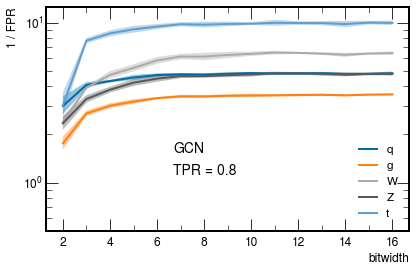

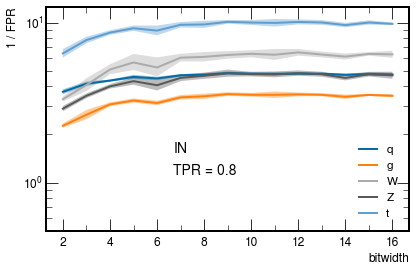

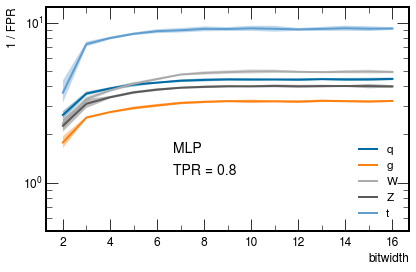

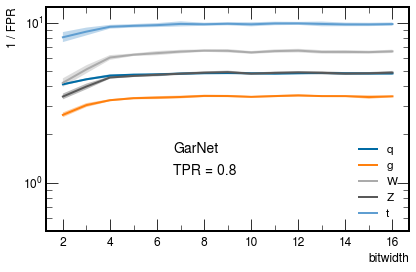

In [21]:
tpr = 0.8
for j, model in enumerate(architectures):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=True)
    for k, label in enumerate(labels):
        bitwidth = df_models_fpr['nbits'][model, tpr, label];
        fpr_mean = df_models_fpr['fpr_mean'][model, tpr, label];
        fpr_std = df_models_fpr['fpr_std'][model, tpr, label];
        axs.plot(bitwidth, 1/fpr_mean, label=labels_paper_style[k])
        axs.fill_between(bitwidth, 1/(fpr_mean+fpr_std), 1/(fpr_mean-fpr_std), alpha=0.4)
    axs.set_xlabel("bitwidth")
    axs.set_ylabel("1 / FPR")
    axs.legend(loc="lower right")
    axs.set_yscale('log')
    axs.xaxis.set_ticks(range(2, 17, 2))
    axs.text(0.35, 0.35, model_labels[j], transform=axs.transAxes)
    axs.text(0.35, 0.25, f"TPR = {tpr:.1f}", transform=axs.transAxes)
    
    axs.xaxis.set_major_locator(MultipleLocator(2))
    axs.xaxis.set_major_formatter('{x:.0f}')

    # For the minor ticks, use no labels; default NullFormatter.
    axs.xaxis.set_minor_locator(MultipleLocator(1))
    #axs[j].yaxis.set_minor_locator(MultipleLocator(1))
    axs.set_ylim(5e-1, 1.25e1)
    #print(dir(axs[0]))
    #handles, labels = axs[0].get_legend_handles_labels()
    #fig.legend(handles, labels)
    fig.savefig(f"./{RESULTDIR}/{model_labels[j]}_1_over_fpr_at_0p8tpr.pdf")
    fig.savefig(f"./{RESULTDIR}/{model_labels[j]}_1_over_fpr_at_0p8tpr.png", dpi=300)
    fig.show()

## AUC
### Data prep

In [22]:
df = pd.read_csv(f"{DATADIR}/{metrics[1]}_{architectures[0]}_nconst_8_nbits_{nbits[0]}_KFold_10.csv")
df

model   label  AUC_mean   AUC_std
0  QGraphConv   gluon  0.703011  0.021265
1  QGraphConv   quark  0.794195  0.015504
2  QGraphConv       W  0.726140  0.013749
3  QGraphConv       Z  0.716204  0.023819
4  QGraphConv     top  0.842812  0.017577

In [23]:
metric = metrics[1] #AUC
frames_auc = []
for model in architectures:
    try:
        model_data = f"{DATADIR}/{metric}_{model}_nconst_8_nbits"
        for n in nbits:
            model_data_path = f"{model_data}_{n}_KFold_10.csv"
            df_i = pd.read_csv(model_data_path, sep=r'\s*,\s*', engine='python',
                               index_col=[0, 1]
                              )
            #df_i.insert(0, 'model', model)
            df_i['nbits'] = n
            #print(df_i)
            frames_auc.append(df_i)
    except:
        print(f"Data missing for {model}")
#frames = list(itertools.chain(*frames))
df_models_auc = pd.concat(frames_auc)
#print(df_models_auc)
#df_models_auc = pd.MultiIndex.from_frame(df_models_auc)


In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7), tight_layout=True, sharey=False)
axs =  axs.flatten()
for i, model in enumerate(architectures):
    for n, label in enumerate(labels):
        bitwidth = df_models_auc['nbits'][model, label]
        auc_mean = df_models_auc['AUC_mean'][model, label];
        auc_std = df_models_auc['AUC_std'][model, label];
        axs[i].plot(bitwidth, auc_mean, label=labels_paper_style[n])
        axs[i].fill_between(bitwidth, auc_mean-auc_std, auc_mean+auc_std, alpha=0.4)
    axs[i].set_xlabel("bitwidth")
    axs[i].set_ylabel("AUC")
    #axs[i].text(0.8, 0.47, f"{model_labels[i].rjust(7)}", transform=axs[i].transAxes)
    axs[i].legend(title=f"{model_labels[i].rjust(3)}", loc="lower right")
    #axs[i].set_yscale('log')
    axs[i].set_ylim(0.45, 1)    
    axs[i].xaxis.set_major_locator(MultipleLocator(2))
    axs[i].xaxis.set_major_formatter('{x:.0f}')

    # For the minor ticks, use no labels; default NullFormatter.
    axs[i].xaxis.set_minor_locator(MultipleLocator(1))
    
#handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels)
fig.savefig(f"./{RESULTDIR}/auc.pdf")
fig.savefig(f"./{RESULTDIR}/auc.png", dpi=300)
fig.show()


<ipython-input-24-c8877eed15d8>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


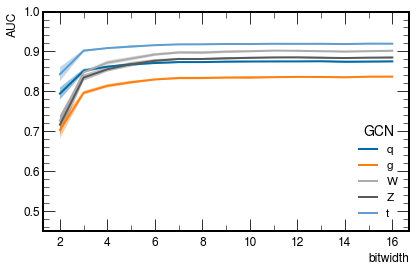

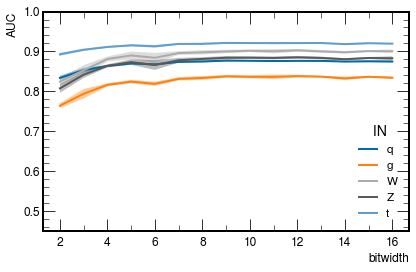

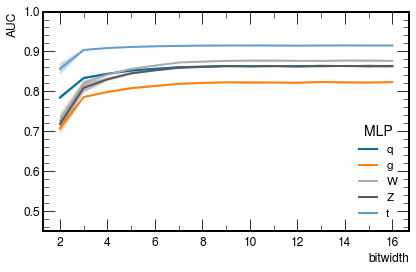

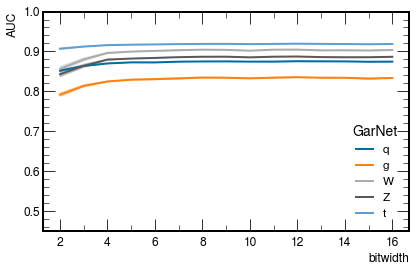

In [25]:
for j, model in enumerate(architectures):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)
    for n, label in enumerate(labels):
        bitwidth = df_models_auc['nbits'][model, label]
        auc_mean = df_models_auc['AUC_mean'][model, label];
        auc_std = df_models_auc['AUC_std'][model, label];
        axs.plot(bitwidth, auc_mean, label=labels_paper_style[n])
        axs.fill_between(bitwidth, auc_mean-auc_std, auc_mean+auc_std, alpha=0.4)
    axs.set_xlabel("bitwidth")
    axs.set_ylabel("AUC")
    axs.legend(title=f"{model_labels[j].rjust(3)}", loc="lower right")
    axs.set_ylim(0.45, 1)    
    
    #axs.text(0.81, 0.42, f"{model_labels[j].rjust(6)}", transform=axs.transAxes)
    axs.xaxis.set_major_locator(MultipleLocator(2))
    axs.xaxis.set_major_formatter('{x:.0f}')
    # For the minor ticks, use no labels; default NullFormatter.
    axs.xaxis.set_minor_locator(MultipleLocator(1))
    
    fig.savefig(f"./{RESULTDIR}/auc_{model_labels[j]}.pdf")#, bbox_inches=extent.expanded(1.15, 1.25))
    fig.savefig(f"./{RESULTDIR}/auc_{model_labels[j]}.png", dpi=300)#, bbox_inches=extent.expanded(1.15, 1.25))
    #plt.close(fig)

## Metrics vs # constits

In [26]:
DATADIR = "performance_vs_n_constit_data"

metrics = (
    r"FPR@TPR",
    "ROCAUC",
    "ACCURACY",
)

architectures = (
    "GraphConv",
    "InteractionNetwork",
    "MLP",
    "Garnet",  
)

model_labels = (
    "GCN",
    "IN",
    "MLP",
    "GarNet",  
)
n_constits = (8, 16, 32)

In [27]:
frames_n_constit = []
metric =  metrics[0]
for model in architectures:
    for n in n_constits:
        try:
            model_data_path = f"{DATADIR}/{metric}_{model}_nconst_{n}.csv"
            df_i = pd.read_csv(model_data_path, sep=r'\s*,\s*', engine='python',
                               index_col=[0, 1]
                              )
            #df_i.insert(0, 'model', model)
            df_i['n_constits'] = n
            df_i['n_constits2'] = n
            #print(df_i)
            frames_n_constit.append(df_i)
        except:
            print(f"Data missing for {model}")
#frames = list(itertools.chain(*frames))
df_models_fprtpr_n_constit = pd.concat(frames_n_constit)
df_models_fprtpr_n_constit = df_models_fprtpr_n_constit.reset_index()
df_models_fprtpr_n_constit = df_models_fprtpr_n_constit.set_index(["model", "label", "treshold", "n_constits"])

In [28]:
frames_n_constit = []
metric =  metrics[1]
for model in architectures:
    for n in n_constits:
        try:
            model_data_path = f"{DATADIR}/{metric}_{model}_nconst_{n}.csv"
            df_i = pd.read_csv(model_data_path, sep=r'\s*,\s*', engine='python',
                               index_col=[0, 1]
                              )
            df_i.insert(0, 'model', model)
            df_i['n_constits'] = n
            
            df_i = df_i.reset_index()
            df_i = df_i.set_index(["model", "n_constits"])
            frames_n_constit.append(df_i)
        except:
            print(f"Data missing for {model}")
#frames = list(itertools.chain(*frames))
df_models_rocauc_n_constit = pd.concat(frames_n_constit)

In [29]:
frames_n_constit = []
metric =  metrics[2]
for model in architectures:
    for n in n_constits:
        try:
            model_data_path = f"{DATADIR}/{metric}_{model}_nconst_{n}.csv"
            df_i = pd.read_csv(model_data_path, sep=r'\s*,\s*', engine='python',
                               index_col=[0, 1]
                              )
            df_i.insert(0, 'model', model)
            df_i['n_constits'] = n
            df_i = df_i.reset_index()
            df_i = df_i.set_index(["model", "n_constits"])
            frames_n_constit.append(df_i)
        except:
            print(f"Data missing for {model}")
#frames = list(itertools.chain(*frames))
df_models_acc_n_constit = pd.concat(frames_n_constit)

In [30]:
df_models_fprtpr_n_constit
#df_models_rocauc_n_constit
#df_models_acc_n_constit

tpr       fpr  n_constits2
model     label treshold n_constits                                 
GraphConv gluon 0.3      8           0.300019  0.044292            8
                0.5      8           0.500009  0.101627            8
                0.8      8           0.800010  0.296309            8
          quark 0.3      8           0.300050  0.020573            8
                0.5      8           0.500053  0.055345            8
...                                       ...       ...          ...
Garnet    Z     0.5      32          0.500214  0.006386           32
                0.8      32          0.800007  0.062789           32
          top   0.3      32          0.300022  0.006130           32
                0.5      32          0.500264  0.014117           32
                0.8      32          0.800031  0.054116           32

[180 rows x 3 columns]

In [31]:
df_models_fprtpr_n_constit.loc[(model, label, 0.8, slice(None)), "fpr"].index

MultiIndex([('Garnet', 'top', 0.8,  8),
            ('Garnet', 'top', 0.8, 16),
            ('Garnet', 'top', 0.8, 32)],
           names=['model', 'label', 'treshold', 'n_constits'])

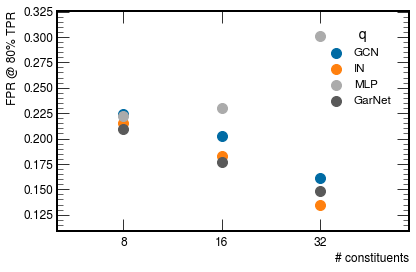

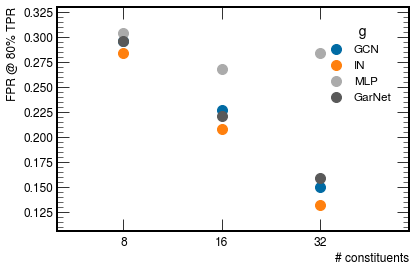

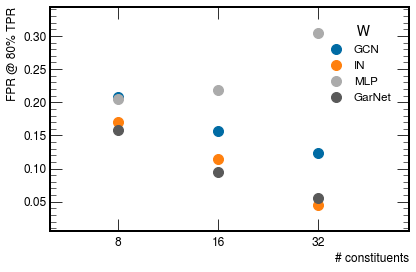

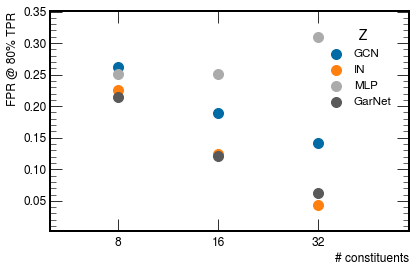

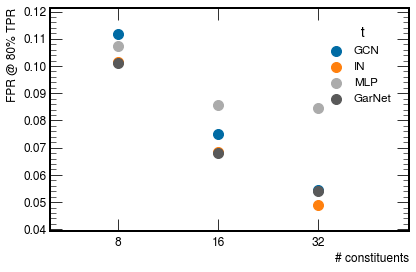

In [32]:
for n, label in enumerate(labels):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)
    for j, model in enumerate(architectures):  
        n_constits = [i[3] for i in  df_models_fprtpr_n_constit.loc[(model, label, 0.8, slice(None)), "fpr"].index]
        fpr = df_models_fprtpr_n_constit.loc[(model, label, 0.8, slice(None)), "fpr"]
        axs.scatter(n_constits, fpr, label=model_labels[j])

    axs.set_xlabel("# constituents")
    axs.set_ylabel(r"FPR @ 80% TPR")
    axs.legend(title=f"{labels_paper_style[n].rjust(3)}",
               #loc="upper left",
               borderaxespad=1,
              )
    axs.set_xscale('log')
    #axs.set_yscale('log')
    #axs.set_ylim(0.1, 0.4)    
        
    #axs.text(0.81, 0.42, f"{model_labels[j].rjust(6)}", transform=axs.transAxes)
    axs.set_xlim(5, 60)
    axs.margins(y=0.15)
    axs.xaxis.set_major_locator(plt.FixedLocator(n_constits))
    axs.xaxis.set_major_formatter('{x:.0f}')
    axs.xaxis.set_minor_locator(plt.NullLocator())

    fig.savefig(f"./{RESULTDIR}/fpr_vs_n_constit_{label}.pdf")#, bbox_inches=extent.expanded(1.15, 1.25))
    fig.savefig(f"./{RESULTDIR}/fpr_vs_n_constit_{label}.png", dpi=300)#, bbox_inches=extent.expanded(1.15, 1.25))
    plt.show()
    plt.close(fig)

In [33]:
fpr_mean = np.mean([df_models_fprtpr_n_constit.loc[(model, label, 0.8, slice(None)), "fpr"] for label in labels],axis=0)
fpr_mean

array([0.19578503, 0.13626711, 0.09607359])

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)
for j, model in enumerate(architectures):  
    
    n_constits = [i[3] for i in  df_models_fprtpr_n_constit.loc[(model, labels[0], 0.8, slice(None)), "fpr"].index]

    fpr_mean = np.mean([df_models_fprtpr_n_constit.loc[(model, label, 0.8, slice(None)), "fpr"] for label in labels], axis=0)
    axs.scatter(n_constits, fpr_mean, label=model_labels[j])

axs.set_xlabel("# constituents")
axs.set_ylabel(r"Avg. FPR @ 80% TPR")
axs.legend(borderaxespad=1,)
axs.set_xscale('log')
#axs.set_yscale('log')
#axs.set_ylim(0.1, 0.4)    
        
    #axs.text(0.81, 0.42, f"{model_labels[j].rjust(6)}", transform=axs.transAxes)
axs.set_xlim(5, 60)
axs.margins(y=0.15)
axs.xaxis.set_major_locator(plt.FixedLocator(n_constits))
axs.xaxis.set_major_formatter('{x:.0f}')
axs.xaxis.set_minor_locator(plt.NullLocator())

fig.savefig(f"./{RESULTDIR}/fpr_vs_n_constit_average.pdf")#, bbox_inches=extent.expanded(1.15, 1.25))
fig.savefig(f"./{RESULTDIR}/fpr_vs_n_constit_average.png", dpi=300)#, bbox_inches=extent.expanded(1.15, 1.25))
plt.show()
plt.close(fig)

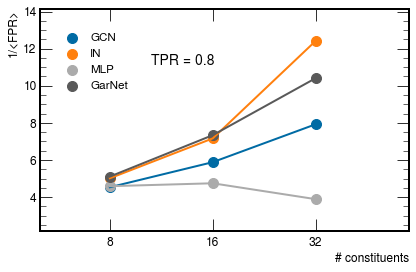

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)
tpr = 0.8
for j, model in enumerate(architectures):  
    
    n_constits = [i[3] for i in  df_models_fprtpr_n_constit.loc[(model, labels[0], tpr, slice(None)), "fpr"].index]

    fpr_mean = np.mean([df_models_fprtpr_n_constit.loc[(model, label, tpr, slice(None)), "fpr"] for label in labels], axis=0)
    axs.scatter(n_constits, 1/fpr_mean, label=model_labels[j])
    axs.plot(n_constits, 1/fpr_mean,)

axs.set_xlabel("# constituents")
axs.set_ylabel(r"1/<FPR>")
axs.text(0.3, 0.75, f"TPR = {tpr:.1f}", transform=axs.transAxes)
axs.legend(borderaxespad=1.5, loc="upper left")
axs.set_xscale('log')

axs.set_xlim(5, 60)
axs.margins(y=0.2)
axs.xaxis.set_major_locator(plt.FixedLocator(n_constits))
axs.xaxis.set_major_formatter('{x:.0f}')
axs.xaxis.set_minor_locator(plt.NullLocator())

fig.savefig(f"./{RESULTDIR}/1_over_fpr_vs_n_constit_average.pdf")#, bbox_inches=extent.expanded(1.15, 1.25))
fig.savefig(f"./{RESULTDIR}/1_over_fpr_vs_n_constit_average.png", dpi=300)#, bbox_inches=extent.expanded(1.15, 1.25))
plt.show()
plt.close(fig)

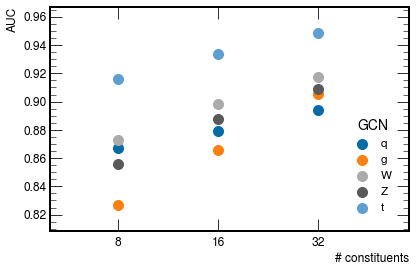

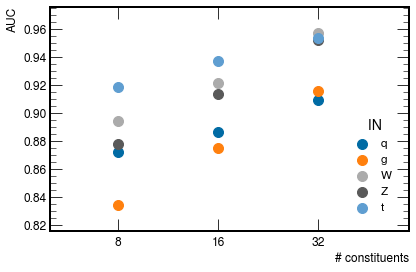

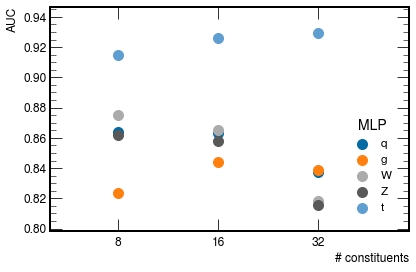

In [36]:
for j, model in enumerate(architectures):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)

    for n, label in enumerate(labels):
        n_constits = [i[1] for i in df_models_rocauc_n_constit.loc[(model, slice(None)), label].index]
        auc_mean = df_models_rocauc_n_constit.loc[(model, slice(None)), label]
        axs.scatter(n_constits, auc_mean, label=labels_paper_style[n])

    axs.set_xlabel("# constituents")
    axs.set_xscale('log')
    axs.set_ylabel("AUC")
    axs.legend(title=f"{model_labels[j].rjust(3)}", loc="lower right", borderaxespad=1)
    axs.set_xlim(5, 60)
    #axs.set_ylim(0.7, 1)    
    axs.margins(y=0.15)
    #axs.text(0.81, 0.42, f"{model_labels[j].rjust(6)}", transform=axs.transAxes)
    axs.xaxis.set_major_locator(plt.FixedLocator(n_constits))
    axs.xaxis.set_major_formatter('{x:.0f}')
    axs.xaxis.set_minor_locator(plt.NullLocator())

        
    #fig.savefig(f"./{RESULTDIR}/auc_vs_n_constit_{model_labels[j]}.pdf")#, bbox_inches=extent.expanded(1.15, 1.25))
    #fig.savefig(f"./{RESULTDIR}/auc_vs_n_constit_{model_labels[j]}.png", dpi=300)#, bbox_inches=extent.expanded(1.15, 1.25))
    plt.show()
    plt.close(fig)

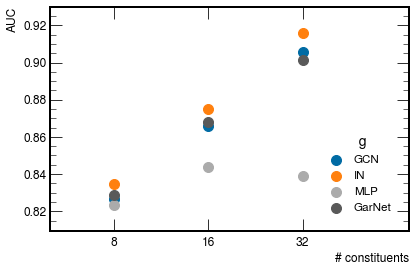

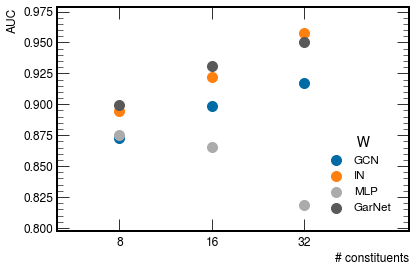

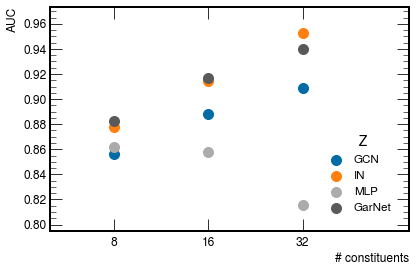

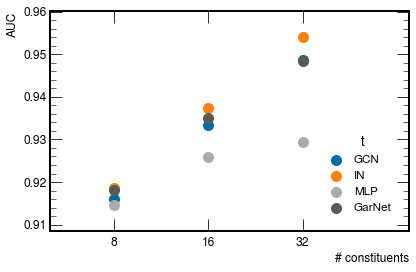

In [37]:
for n, label in enumerate(labels):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)
    for j, model in enumerate(architectures):  
        n_constits = [i[1] for i in  df_models_rocauc_n_constit.loc[(model, slice(None)), label].index]
        auc_mean = df_models_rocauc_n_constit.loc[(model, slice(None)), label]
        axs.scatter(n_constits, auc_mean, label=model_labels[j])

    axs.set_xlabel("# constituents")
    axs.set_ylabel("AUC")
    axs.legend(title=f"{labels_paper_style[n].rjust(3)}", loc="lower right", borderaxespad=1)
    
    #axs.set_ylim(0.45, 1)    
        
    #axs.text(0.81, 0.42, f"{model_labels[j].rjust(6)}", transform=axs.transAxes)
    
    axs.set_xscale("log")
    axs.set_xlim(5, 70)
    axs.margins(y=0.15)
    axs.xaxis.set_major_locator(plt.FixedLocator(n_constits))
    axs.xaxis.set_major_formatter('{x:.0f}')
    axs.xaxis.set_minor_locator(plt.NullLocator())
        
    fig.savefig(f"./{RESULTDIR}/auc_vs_n_constit_{label}.pdf")#, bbox_inches=extent.expanded(1.15, 1.25))
    fig.savefig(f"./{RESULTDIR}/auc_vs_n_constit_{label}.png", dpi=300)#, bbox_inches=extent.expanded(1.15, 1.25))
    plt.show()
    plt.close(fig)

In [38]:
df_models_acc_n_constit

gluon     quark         W         Z  \
model              n_constits                                           
GraphConv          8           0.824284  0.858041  0.845727  0.848123   
                   16          0.845568  0.867128  0.863922  0.869466   
                   32          0.871343  0.880923  0.881367  0.882999   
InteractionNetwork 8           0.825892  0.859494  0.863464  0.869824   
                   16          0.849211  0.870386  0.882373  0.887242   
                   32          0.878185  0.884914  0.924036  0.928585   
MLP                8           0.823571  0.856205  0.845406  0.850344   
                   16          0.839621  0.859112  0.833378  0.838764   
                   32          0.842889  0.858223  0.807369  0.809659   
Garnet             8           0.824477  0.859769  0.864893  0.871983   
                   16          0.847390  0.870227  0.892404  0.897775   
                   32          0.867689  0.882197  0.916519  0.920096   

                                    top   acc_avg  
model              n_constits                      
GraphConv          8           0.899125  0.610434  
                   16          0.907049  0.659170  
                   32          0.917080  0.706219  
InteractionNetwork 8           0.901260  0.633908  
                   16          0.909638  0.685100  
                   32          0.920902  0.759673  
MLP                8           0.899473  0.612848  
                   16          0.902435  0.614508  
                   32          0.899935  0.571154  
Garnet             8           0.902194  0.640193  
                   16          0.910200  0.697028  
                   32          0.917104  0.742059

In [39]:
n_constits

[8, 16, 32]

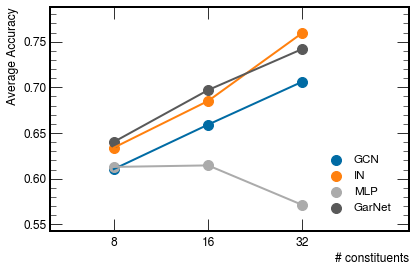

In [40]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True, sharey=False)
for j, model in enumerate(architectures):  
    n_constits = [i[1] for i in  df_models_acc_n_constit.loc[(model, slice(None)), "acc_avg"].index]
    acc_avg = df_models_acc_n_constit.loc[(model, slice(None)), "acc_avg"]
    axs.scatter(n_constits, acc_avg, label=model_labels[j])
    axs.plot(n_constits, acc_avg,)
axs.set_xlabel("# constituents")
axs.set_ylabel("Average Accuracy")
axs.legend(loc="lower right", borderaxespad=1)
#axs.set_yscale('log')
#axs.set_ylim(0.45, 1)    
    
#axs.text(0.81, 0.42, f"{model_labels[j].rjust(6)}", transform=axs.transAxes)
axs.set_xscale("log")
axs.set_xlim(5, 70)
axs.margins(y=0.15)

axs.xaxis.set_major_locator(plt.FixedLocator(n_constits))
axs.xaxis.set_major_formatter('{x:.0f}')
axs.xaxis.set_minor_locator(plt.NullLocator())
    
fig.savefig(f"./{RESULTDIR}/avg_acc_vs_n_constit.pdf")#, bbox_inches=extent.expanded(1.15, 1.25))
fig.savefig(f"./{RESULTDIR}/avg_acc_vs_n_constit.png", dpi=300)#, bbox_inches=extent.expanded(1.15, 1.25))
plt.show()
plt.close(fig)